# Exploratory analysis of training sets and errors

In [1]:
import warnings

warnings.simplefilter('ignore')

In [2]:
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt

import pandas as pd

from IPython.display import Image

In [3]:
import crosses

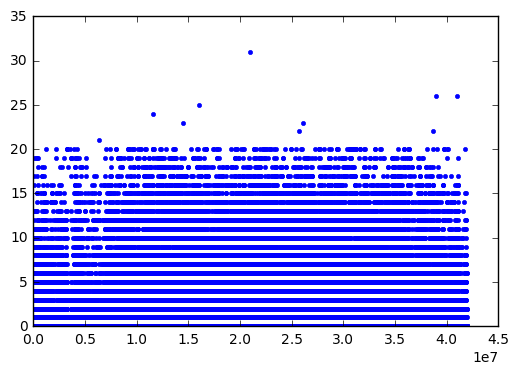

In [4]:
x, y = zip(*((pos, error[1][1]) for pos, error in crosses.mendel_results.items()))
plt.plot(x, y, '.')

In [5]:
window_size = 250000
max_pos = max(crosses.mendel_results.keys())
num_bins = max_pos // window_size + 1
wins = [[0, 0] for x in range(num_bins)]
for pos in crosses.mendel_results:
    wins[pos // window_size][0] += 1
for pos, err in crosses.mendel_results.items():
    if err[1][1] == 0:
        continue
    wins[pos // window_size][1] += 1
frac_errors = [errs / poses for poses, errs in wins]

0.13783792835383268

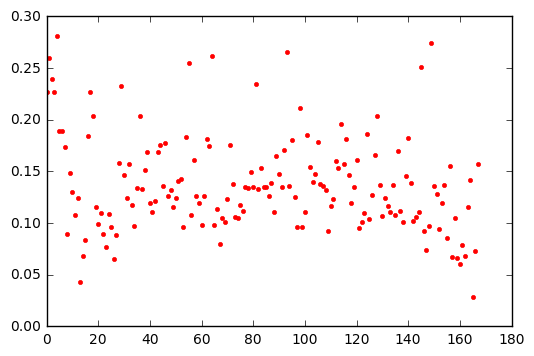

In [6]:
plt.plot(frac_errors, '.', c='r')
sum(frac_errors)/len(frac_errors)

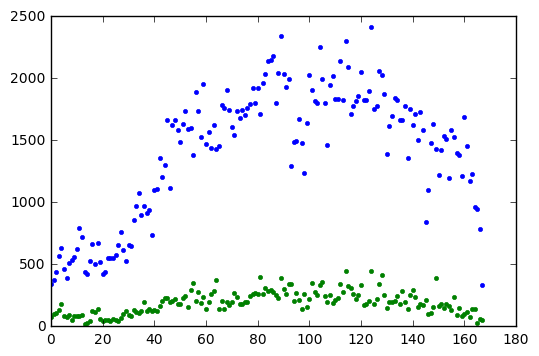

In [7]:
plt.plot([poses for poses in wins], '.')

In [8]:
#errors by annotation type

In [9]:
for entry in crosses.store_3L.get_node('/3L/variants'):
    print(entry)

/3L/variants/AC (EArray(2501730,), shuffle, zlib(1)) ''
/3L/variants/AF (EArray(2501730,), shuffle, zlib(1)) ''
/3L/variants/ALT (EArray(2501730,), shuffle, zlib(1)) ''
/3L/variants/AN (EArray(2501730,), shuffle, zlib(1)) ''
/3L/variants/ANN (EArray(2501730,), shuffle, zlib(1)) ''
/3L/variants/Accessible (EArray(2501730,), shuffle, zlib(1)) ''
/3L/variants/BaseCounts (EArray(2501730, 4), shuffle, zlib(1)) ''
/3L/variants/BaseQRankSum (EArray(2501730,), shuffle, zlib(1)) ''
/3L/variants/CHROM (EArray(2501730,), shuffle, zlib(1)) ''
/3L/variants/ClippingRankSum (EArray(2501730,), shuffle, zlib(1)) ''
/3L/variants/Coverage (EArray(2501730,), shuffle, zlib(1)) ''
/3L/variants/CoverageMQ0 (EArray(2501730,), shuffle, zlib(1)) ''
/3L/variants/DP (EArray(2501730,), shuffle, zlib(1)) ''
/3L/variants/DS (EArray(2501730,), shuffle, zlib(1)) ''
/3L/variants/Dels (EArray(2501730,), shuffle, zlib(1)) ''
/3L/variants/FILTER_LowQual (EArray(2501730,), shuffle, zlib(1)) ''
/3L/variants/FILTER_PASS (EAr

In [10]:
annotations = ['AC', 'AF', 'AN', 'Coverage', 'DP', 'HRun', 'HaplotypeScore', 'InbreedingCoeff',
              'MLEAC', 'MQ', 'MQRankSum', 'MQ0',
               'QD', 'QUAL', 'POS', 'FS', 'ReadPosRankSum']

In [11]:
train_raw = crosses.get_train(annotations, normalize=False, scale=False)
train_pre = crosses.get_train(annotations)
train_no_norm = crosses.get_train(annotations, normalize=False)

## Exploratory analysis

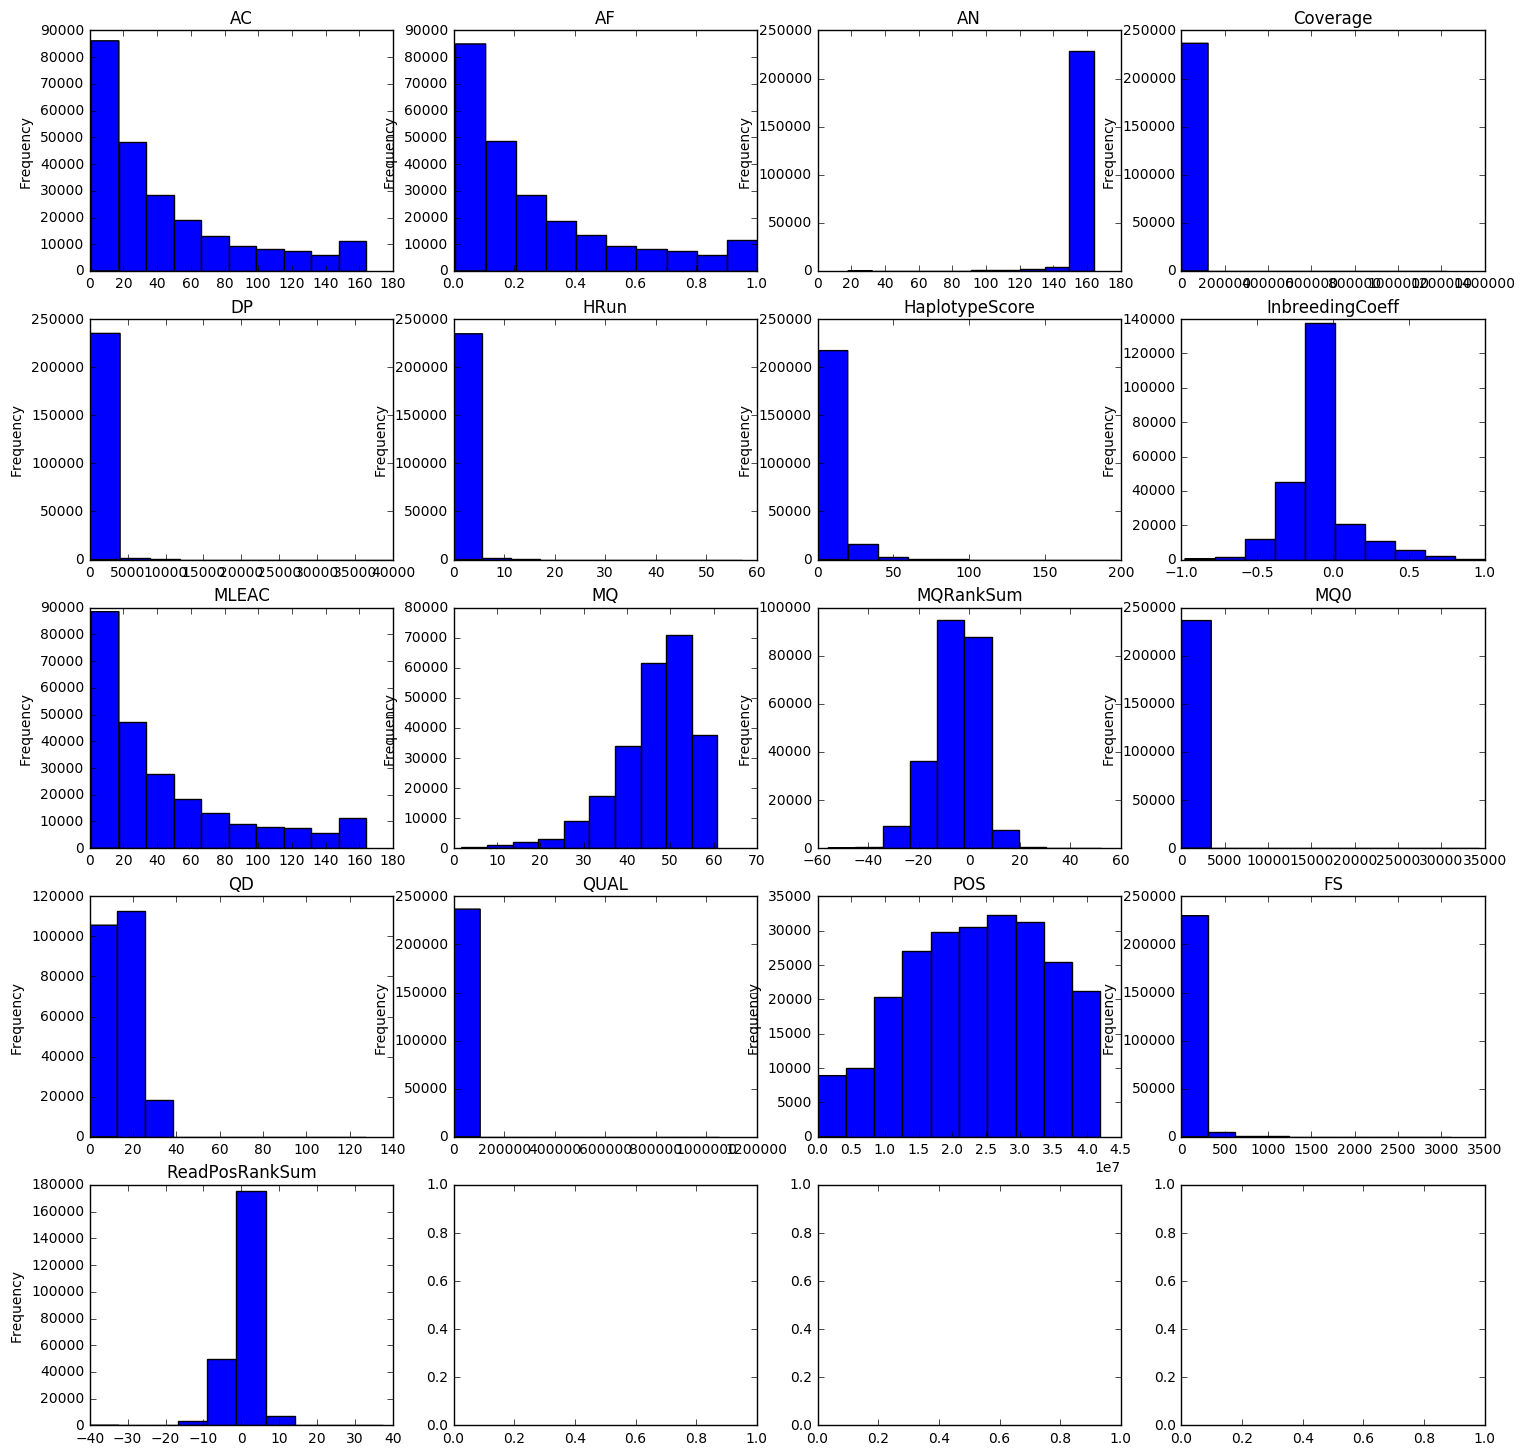

In [12]:
ncols = 4
fig, axs = plt.subplots(5, ncols, figsize=(18, 18), squeeze=False)
row = 0
col = 0
for annotation in annotations:
    train_raw[annotation].plot.hist(ax=axs[row, col])
    axs[row, col].set_title(annotation)
    col += 1
    if col == ncols:
        col = 0
        row += 1

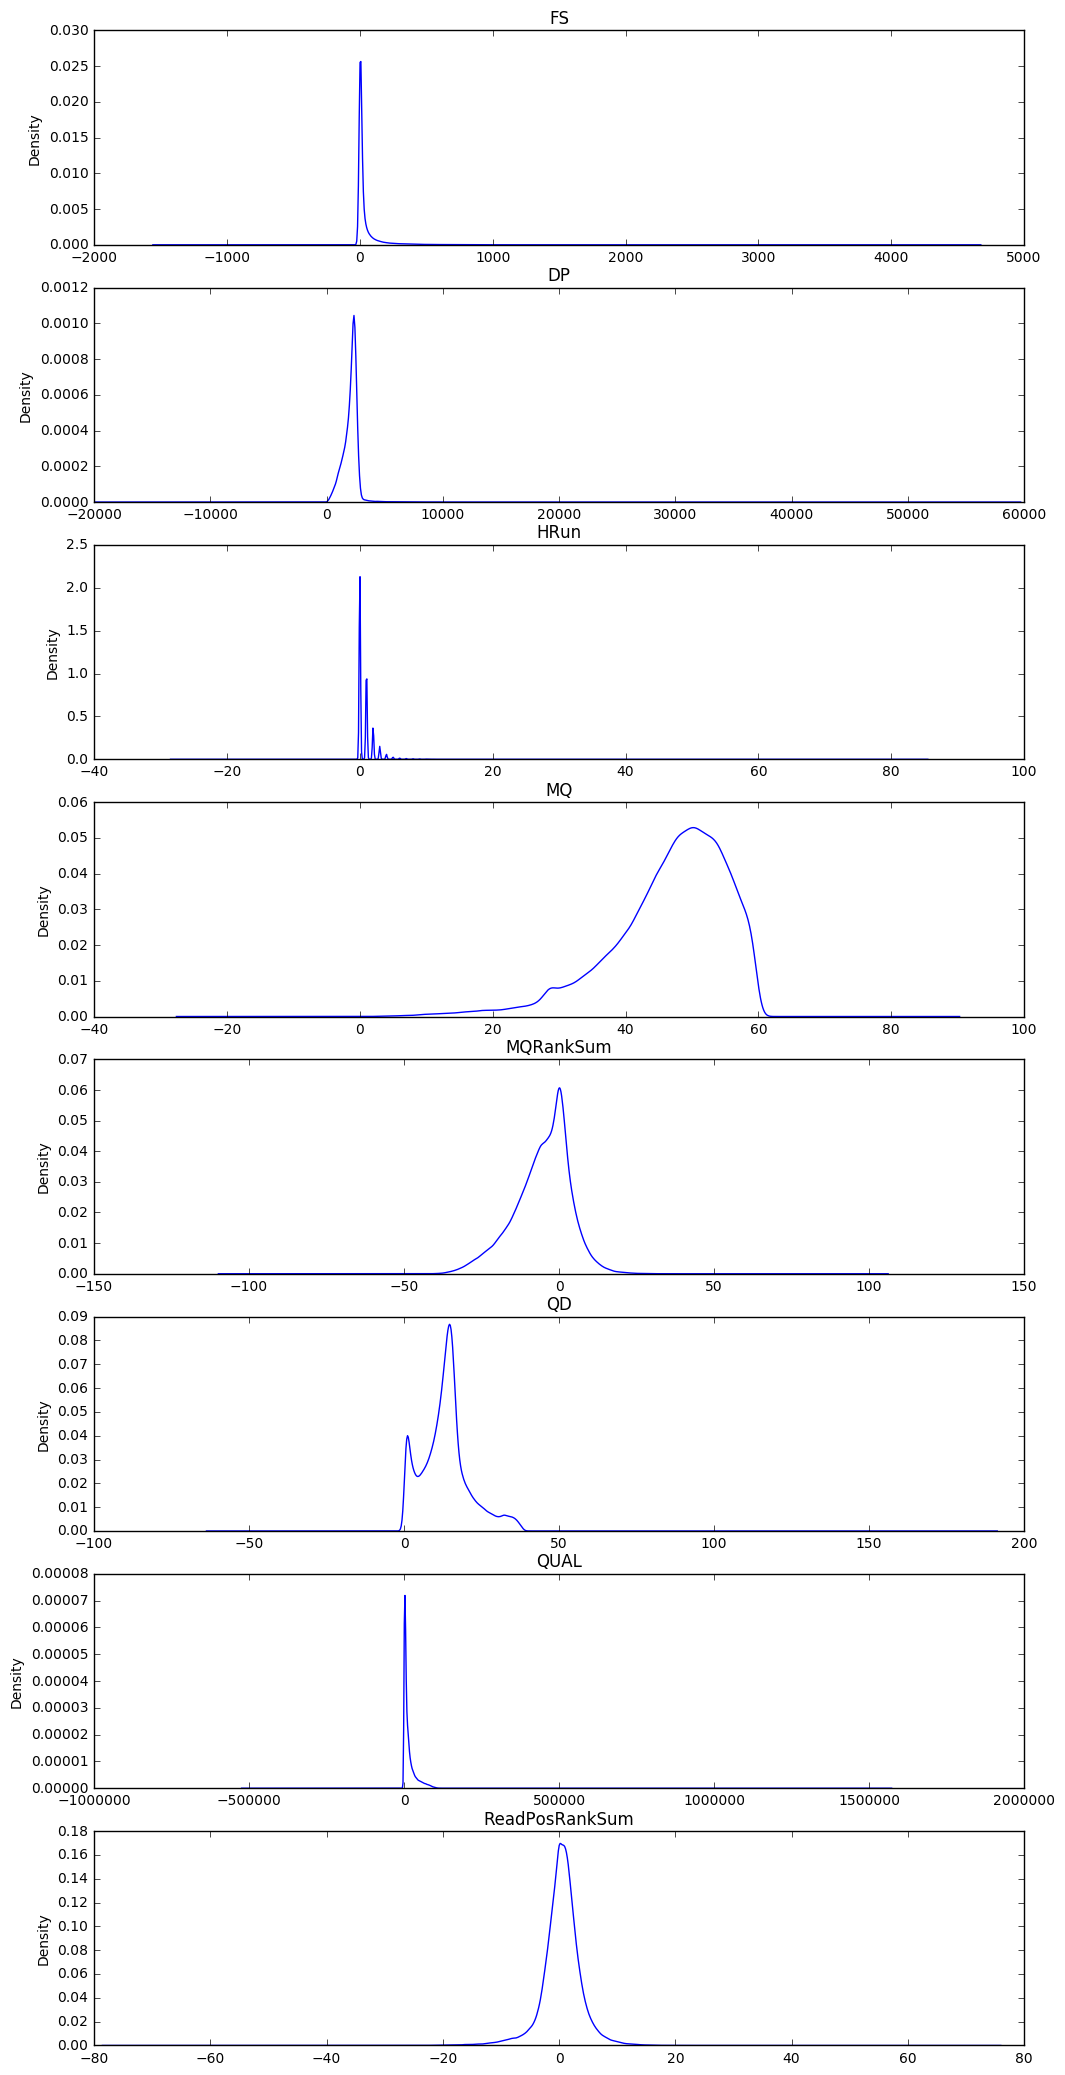

In [13]:
my_annotations = ['FS', 'DP', 'HRun', 'MQ', 'MQRankSum',
               'QD', 'QUAL', 'ReadPosRankSum']
#my_annotations = ['FS', 'DP', 'MQ', 'QD', 'QUAL', 'MQ0']
fig, axs = plt.subplots(len(my_annotations), figsize=(12, 26))
for i, annotation in enumerate(my_annotations):
    train_raw[annotation].plot.kde(ax=axs[i])
    axs[i].set_title(annotation)

(0, 60)

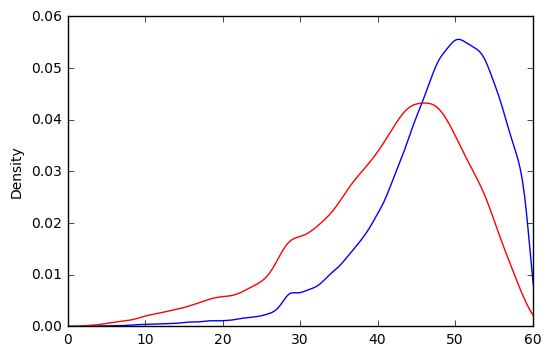

In [14]:
fig, ax = plt.subplots(1)
train_raw[train_raw['OK'] == 1]['MQ'].plot.kde(ax=ax)
train_raw[train_raw['OK'] == 0]['MQ'].plot.kde(ax=ax, c='r')
ax.set_xlim(0, 60)


(-100, 200)

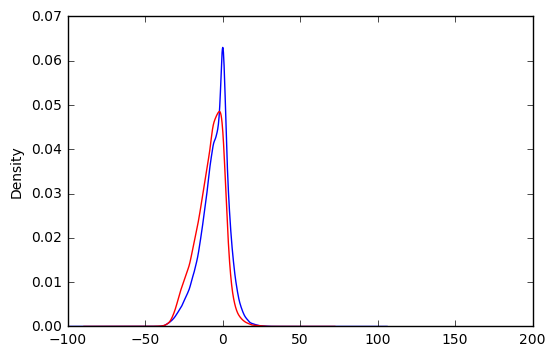

In [15]:
fig, ax = plt.subplots(1)
train_raw[train_raw['OK'] == 1]['MQRankSum'].plot.kde(ax=ax)
train_raw[train_raw['OK'] == 0]['MQRankSum'].plot.kde(ax=ax, c='r')
ax.set_xlim(-100, 200)

(0, 40)

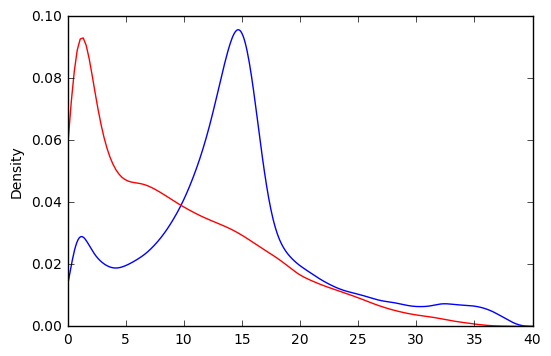

In [16]:
fig, ax = plt.subplots(1)
train_raw[train_raw['OK'] == 1]['QD'].plot.kde(ax=ax)
train_raw[train_raw['OK'] == 0]['QD'].plot.kde(ax=ax, c='r')
ax.set_xlim(0, 40)

(150, 175)

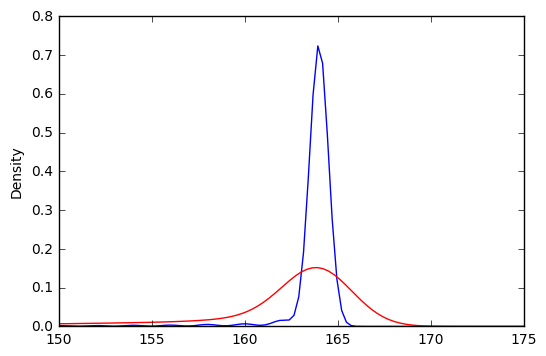

In [17]:
fig, ax = plt.subplots(1)
train_raw[train_raw['OK'] == 1]['AN'].plot.kde(ax=ax)
train_raw[train_raw['OK'] == 0]['AN'].plot.kde(ax=ax,c='r')
ax.set_xlim(150, 175)

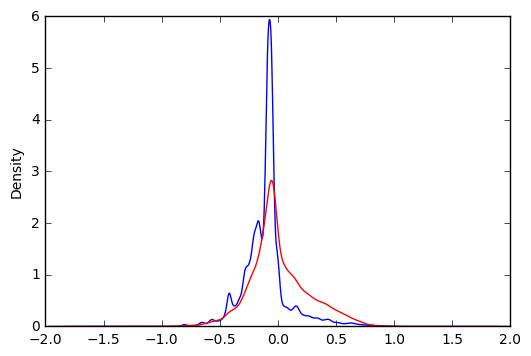

In [18]:
fig, ax = plt.subplots(1)
train_raw[train_raw['OK'] == 1]['InbreedingCoeff'].plot.kde(ax=ax)
train_raw[train_raw['OK'] == 0]['InbreedingCoeff'].plot.kde(ax=ax,c='r')
#ax.set_xlim(150, 175)

(0, 200)

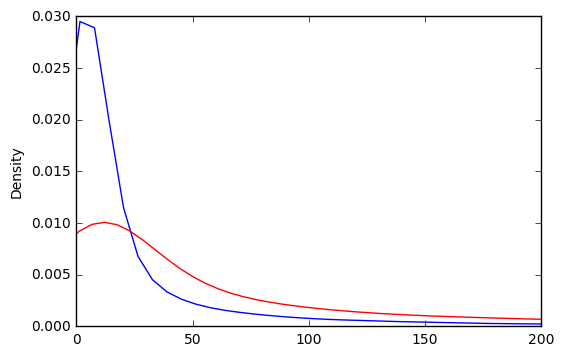

In [19]:
fig, ax = plt.subplots(1)
train_raw[train_raw['OK'] == 1]['FS'].plot.kde(ax=ax)
train_raw[train_raw['OK'] == 0]['FS'].plot.kde(ax=ax,c='r')
ax.set_xlim(0, 200)

(0, 5000)

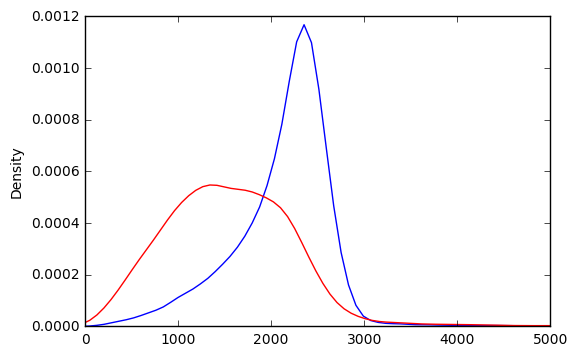

In [20]:
fig, ax = plt.subplots(1)
train_raw[train_raw['OK'] == 1]['DP'].plot.kde(ax=ax)
train_raw[train_raw['OK'] == 0]['DP'].plot.kde(ax=ax,c='r')
ax.set_xlim(0, 5000)

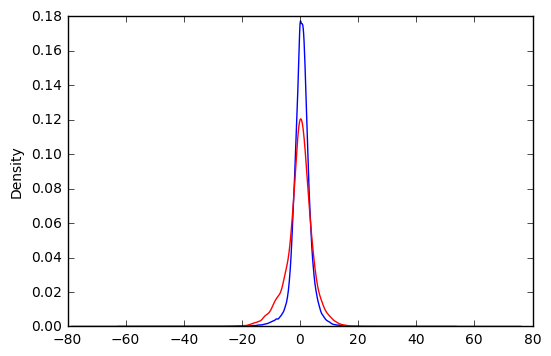

In [21]:
fig, ax = plt.subplots(1)
train_raw[train_raw['OK'] == 1]['ReadPosRankSum'].plot.kde(ax=ax)
train_raw[train_raw['OK'] == 0]['ReadPosRankSum'].plot.kde(ax=ax,c='r')
#ax.set_xlim(0, 5000)

In [22]:
def filter_hard(snp, qd=5):
    if snp['DP'] < 1500 or snp['QD'] < qd or snp['MQ0'] < -50 or snp['MQ0'] > 100:
        return True
    return False

In [23]:
def quantify_filter(qd=5):
    snps_passed = 0
    snps_failed = 0
    good_snps_filtered = 0
    bad_snps_approved = 0
    for id_, snp in train_raw.iterrows():
        filtered_out = filter_hard(snp, qd)
        if filtered_out:
            snps_failed += 1
            if snp['OK'] == 1:
                good_snps_filtered += 1
        else:
            snps_passed += 1
            if snp['OK'] == 0:
                bad_snps_approved += 1
    return snps_passed, snps_failed, good_snps_filtered, bad_snps_approved, bad_snps_approved / snps_passed

print(quantify_filter())
print(quantify_filter(10))

(166550, 70334, 45999, 7999, 0.04802761933353347)
(143088, 93796, 66680, 5218, 0.03646706921614671)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f902b986e48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f902e285c88>]], dtype=object)

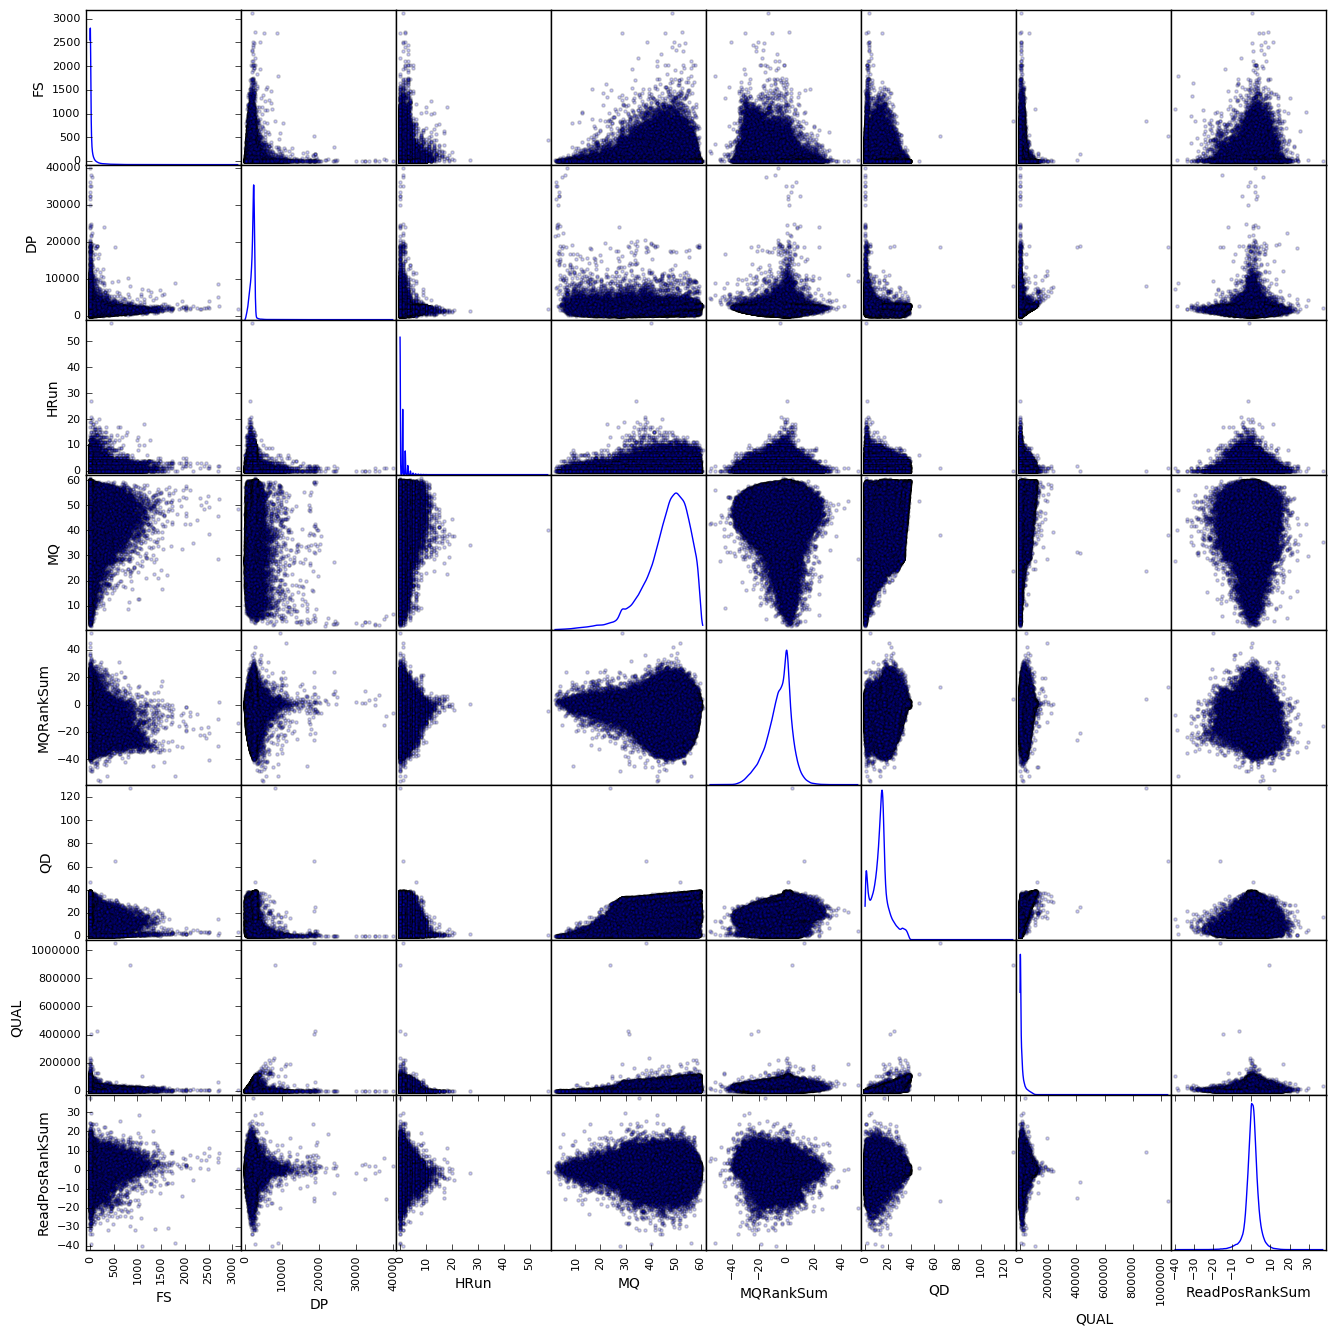

In [24]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(train_raw[my_annotations], alpha=0.2, figsize=(16, 16), diagonal='kde')


(0, 3000)

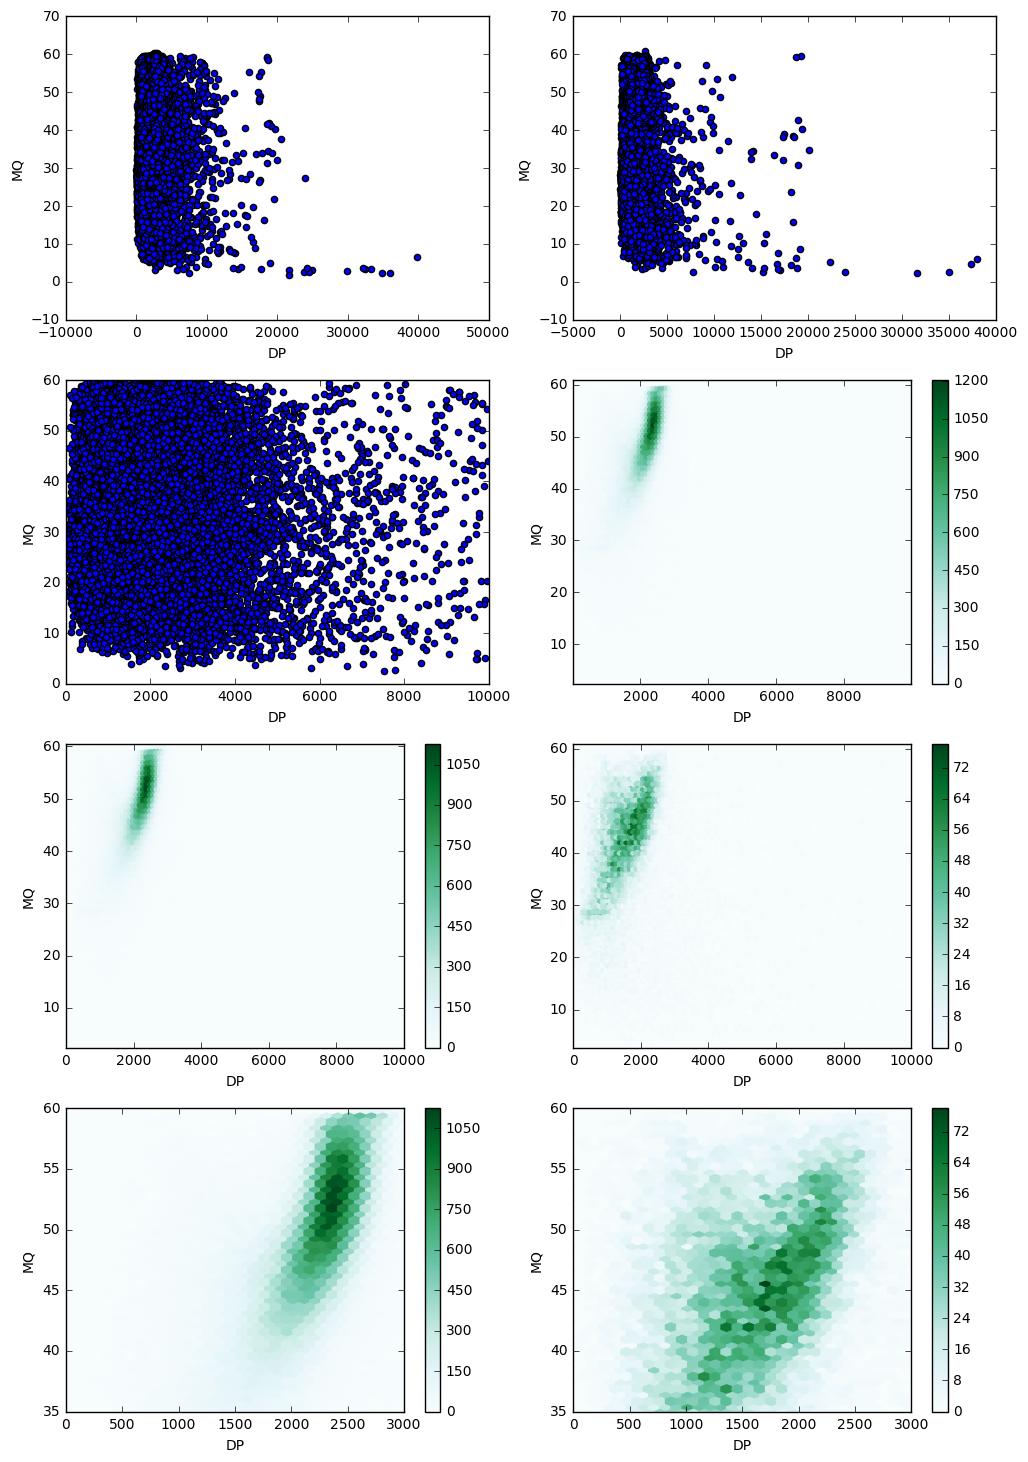

In [25]:
fix, axs = plt.subplots(4, 2, figsize=(12, 18), squeeze=False)

train_raw[train_raw['OK'] == 1].plot.scatter(x='DP', y='MQ', ax=axs[0, 0])
train_raw[train_raw['OK'] == 0].plot.scatter(x='DP', y='MQ', ax=axs[0, 1])


curb_dp = train_raw[train_raw['DP'] < 10000]

curb_dp.plot.scatter(x='DP', y='MQ', ax=axs[1, 0])
axs[1, 0].set_xlim(0, 10000)
axs[1, 0].set_ylim(0, 60)
curb_dp.plot.hexbin(x='DP', y='MQ', ax=axs[1, 1])

curb_dp[curb_dp['OK'] == 1].plot.hexbin(x='DP', y='MQ', ax=axs[2, 0])
axs[2, 0].set_xlim(0, 10000)
curb_dp[curb_dp['OK'] == 0].plot.hexbin(x='DP', y='MQ', ax=axs[2, 1])
axs[2, 1].set_xlim(0, 10000)

curb_dp[curb_dp['OK'] == 1].plot.hexbin(x='DP', y='MQ', ax=axs[3, 0])
axs[3, 0].set_ylim(35, 60)
axs[3, 0].set_xlim(0, 3000)

curb_dp[curb_dp['OK'] == 0].plot.hexbin(x='DP', y='MQ', ax=axs[3, 1])
axs[3, 1].set_ylim(35, 60)
axs[3, 1].set_xlim(0, 3000)


# Support stuff

In [27]:
crosses.store_3L

File(filename=../../raw/crosses-3L.h5, title='', mode='r', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/3L (Group) ''
/3L/samples (Array(80,)) ''
  atom := StringAtom(itemsize=8, shape=(), dflt=b'')
  maindim := 0
  flavor := 'numpy'
  byteorder := 'irrelevant'
  chunkshape := None
/3L/calldata (Group) ''
/3L/calldata/AD (EArray(2501730, 80, 2), shuffle, zlib(1)) ''
  atom := UInt16Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (3276, 10, 2)
/3L/calldata/DP (EArray(2501730, 80), shuffle, zlib(1)) ''
  atom := UInt16Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (6553, 10)
/3L/calldata/GQ (EArray(2501730, 80), shuffle, zlib(1)) ''
  atom := UInt8Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'irrelevant'
  chunkshape := (13107, 10)
/3L/calldata/GT (EArray(2501730, 

In [28]:
!zcat ../../raw/total-3L.vcf.gz|head -95

##fileformat=VCFv4.1
##FILTER=<ID=PASS,Description="All filters passed">
##FILTER=<ID=LowQual,Description="Low quality">
##FORMAT=<ID=AB,Number=1,Type=Float,Description="Allele balance for each het genotype">
##FORMAT=<ID=AD,Number=.,Type=Integer,Description="Allelic depths for the ref and alt alleles in the order listed">
##FORMAT=<ID=DP,Number=1,Type=Integer,Description="Approximate read depth (reads with MQ=255 or with bad mates are filtered)">
##FORMAT=<ID=GQ,Number=1,Type=Integer,Description="Genotype Quality">
##FORMAT=<ID=GT,Number=1,Type=String,Description="Genotype">
##FORMAT=<ID=MQ0,Number=1,Type=Integer,Description="Number of Mapping Quality Zero Reads per sample">
##FORMAT=<ID=PL,Number=G,Type=Integer,Description="Normalized, Phred-scaled likelihoods for genotypes as defined in the VCF specification">
##GATKCommandLine=<ID=SelectVariants,Version=3.3-0-g37228af,Date="Sat Feb 28 09:38:33 GMT 2015",Epoch=1425116313026,CommandLineOptions="analysis_type=SelectVariants input_file